In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../../analysis/mouse_m01_d2/03_simclr_neural/semanticity_stringer.json"),
    Path("../../../analysis/mouse_m02_d3/03_simclr_neural/semanticity_stringer.json"),
    Path("../../../analysis/mouse_m03_d4/03_simclr_neural/semanticity_stringer.json"),
    Path("../../../analysis/mouse_m01_d2/05_vgg19_neural/semanticity_stringer.json"),
    Path("../../../analysis/mouse_m02_d3/05_vgg19_neural/semanticity_stringer.json"),
    Path("../../../analysis/mouse_m03_d4/05_vgg19_neural/semanticity_stringer.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 120 rows from 6 files.


,mouse_id,model,layer,n_pcs,silhouette_score
0,m01_d2,vgg19,conv2_2,10,-0.118043
1,m01_d2,vgg19,conv2_2,20,-0.118359
2,m01_d2,vgg19,conv2_2,50,-0.119311
3,m01_d2,vgg19,conv2_2,100,-0.120023
4,m01_d2,vgg19,conv3_4,10,-0.136806
...,...,...,...,...,...
95,m03_d4,vgg19,conv5_4,100,-0.127971
96,m03_d4,simclr,fc,10,-0.061443
97,m03_d4,simclr,fc,20,-0.038639
98,m03_d4,simclr,fc,50,-0.050579


In [12]:
# Filter to only rows where n_pcs is 100 - standardise
df_pcs = df[(df["n_pcs"] == 100)]
df_pcs

,mouse_id,model,layer,n_pcs,silhouette_score
3,m01_d2,vgg19,conv2_2,100,-0.120023
7,m01_d2,vgg19,conv3_4,100,-0.135842
11,m01_d2,vgg19,conv4_4,100,-0.106339
15,m01_d2,vgg19,conv5_4,100,-0.118442
19,m01_d2,simclr,fc,100,-0.064756
23,m01_d2,vgg19,fc2,100,-0.111706
27,m01_d2,simclr,layer1,100,-0.097031
31,m01_d2,simclr,layer2,100,-0.076060
35,m01_d2,simclr,layer3,100,-0.081273
39,m01_d2,simclr,layer4,100,-0.070624


In [13]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model,layer,n_pcs,silhouette_score
0,simclr,fc,100.0,-0.057643
1,simclr,layer1,100.0,-0.105321
2,simclr,layer2,100.0,-0.085765
3,simclr,layer3,100.0,-0.080130
4,simclr,layer4,100.0,-0.073220
5,vgg19,conv2_2,100.0,-0.124520
6,vgg19,conv3_4,100.0,-0.130015
7,vgg19,conv4_4,100.0,-0.112120
8,vgg19,conv5_4,100.0,-0.118874
9,vgg19,fc2,100.0,-0.107447


In [14]:
# Compute SEM and merge
sem_df = df_pcs.groupby('layer')['silhouette_score'].sem().reset_index()
sem_df.columns = ['layer', 'sem_silhouette_score']
avg_metrics = avg_metrics.merge(sem_df, on='layer', how='left')
avg_metrics

,model,layer,n_pcs,silhouette_score,sem_silhouette_score
0,simclr,fc,100.0,-0.057643,0.004885
1,simclr,layer1,100.0,-0.105321,0.005383
2,simclr,layer2,100.0,-0.085765,0.005631
3,simclr,layer3,100.0,-0.080130,0.002919
4,simclr,layer4,100.0,-0.073220,0.003756
5,vgg19,conv2_2,100.0,-0.124520,0.005225
6,vgg19,conv3_4,100.0,-0.130015,0.003458
7,vgg19,conv4_4,100.0,-0.112120,0.003510
8,vgg19,conv5_4,100.0,-0.118874,0.005132
9,vgg19,fc2,100.0,-0.107447,0.004140


In [20]:
# Load neural semanticity results for each mouse
paths = [
    Path("../../../analysis/mouse_m01_d2/03_simclr_neural/neural_semanticity_stringer.json"),
    Path("../../../analysis/mouse_m02_d3/03_simclr_neural/neural_semanticity_stringer.json"),
    Path("../../../analysis/mouse_m03_d4/03_simclr_neural/neural_semanticity_stringer.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.append(data)

neural_semanticity_df = pd.DataFrame(all_data)
neural_semanticity_df = neural_semanticity_df.sort_values(["mouse_id"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(neural_semanticity_df)} rows from {len(paths)} files.")
neural_semanticity_df.head(100)

Loaded 3 rows from 3 files.


,mouse_id,n_pcs,silhouette_score
0,m01_d2,100,-0.075766
1,m02_d3,100,-0.083230
2,m03_d4,100,-0.071710


In [21]:
# Compute neural_semanticity mean and SEM
neural_semanticity_mean = neural_semanticity_df['silhouette_score'].mean()
neural_semanticity_sem = neural_semanticity_df['silhouette_score'].sem()

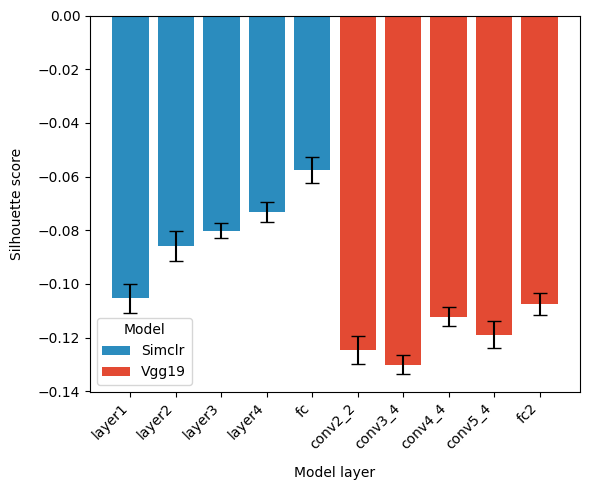

<Figure size 600x500 with 0 Axes>

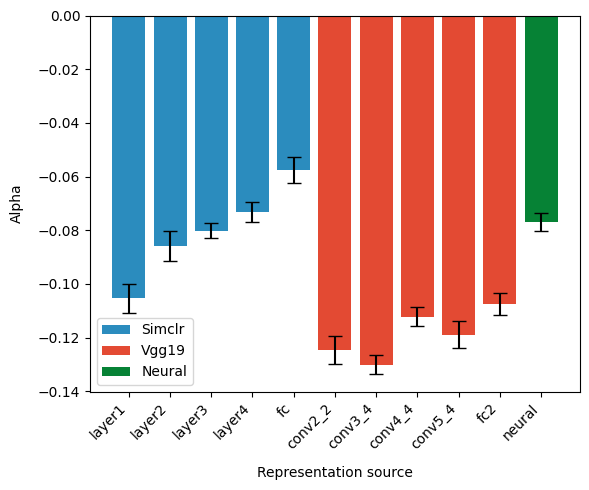

In [ ]:
from cortexlib.utils.plotting import simclr_colours, vgg19_colours, neural_colour

# Clean labels and sort
ordered_labels = [
    'layer1', 'layer2', 'layer3', 'layer4', 'fc',
    'conv2_2', 'conv3_4', 'conv4_4', 'conv5_4', 'fc2'
]
for df in [avg_metrics, df_pcs]:
    df["layer"] = pd.Categorical(
        df["layer"], categories=ordered_labels, ordered=True)

avg_metrics = avg_metrics.sort_values('layer')

# Colour mapping by model
model_colour = {
    'simclr': simclr_colours['layer4'],
    'vgg19': vgg19_colours['conv5_4'],
}

avg_metrics["colour"] = avg_metrics["model"].str.lower().map(
    lambda s: next((v for k, v in model_colour.items() if k in s), None)
)

# Plot
plt.figure(figsize=(6, 5))

plt.bar(
    avg_metrics['layer'],
    avg_metrics['silhouette_score'],
    yerr=avg_metrics['sem_silhouette_score'],
    capsize=5,
    color=avg_metrics['colour']
)

# Axis and legend
plt.ylabel('Silhouette score', labelpad=10)
plt.xlabel('Model layer', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.legend(
    handles=[Patch(facecolor=color, label=model.capitalize())
                for model, color in model_colour.items()],
    title="Model"
)
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(6, 5))

# Extend data for plotting
x_labels = list(avg_metrics['layer'].astype(str)) + ['neural']
heights = list(avg_metrics['silhouette_score']) + [neural_semanticity_mean]
colors = list(avg_metrics['colour']) + [neural_colour]
errors = list(avg_metrics['sem_silhouette_score']) + [neural_semanticity_sem] 

# Plot
plt.figure(figsize=(6, 5))
plt.bar(
    x=x_labels,
    height=heights,
    yerr=errors,
    capsize=5,
    color=colors
)

# Axis and legend
plt.ylabel('Silhouette score', labelpad=10)
plt.xlabel('Representation source', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.legend(
    handles=[
        Patch(facecolor=color, label=model.capitalize())
        for model, color in model_colour.items()
    ] + [Patch(facecolor=neural_colour, label='Neural')],
    # title="Model"
)
plt.tight_layout()
plt.savefig("./figures/stringer-semanticity-bar.svg", format='svg')
plt.show()